<a href="https://colab.research.google.com/github/Elman295/Deep-Learning-Course-INFO/blob/main/CI_CNN_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os


import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchsummary import summary
from torchvision import models
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [3]:
tfms = transforms.Compose([

        transforms.ToTensor(),
        transforms.Normalize(mean = 0.5, std = 0.5)
])

In [4]:
train_ds = datasets.MNIST(

        root = "data",
        download = True,
        train = True,
        transform = tfms
)

test_ds = datasets.MNIST(
    root = "data",
    download = True,
    train = False,
    transform = tfms
)

100%|██████████| 9912422/9912422 [00:00<00:00, 66486671.30it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 70345931.37it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 24131740.56it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 27176217.93it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
train_dl = DataLoader(train_ds, batch_size = 32, shuffle = True)

test_dl = DataLoader(test_ds, batch_size = 32, shuffle = False)

In [6]:
train_dl.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

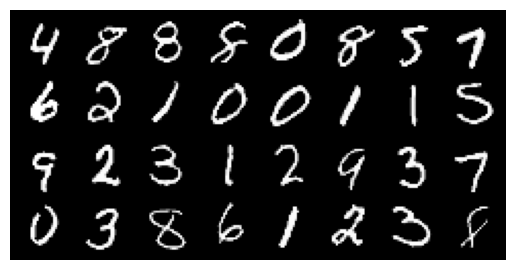

In [8]:
images, labels = next(iter(train_dl))
outs = torchvision.utils.make_grid(tensor = images)

plt.imshow(np.transpose(outs,(1,2,0)))
plt.axis("off")
plt.show()

#`LeNet`

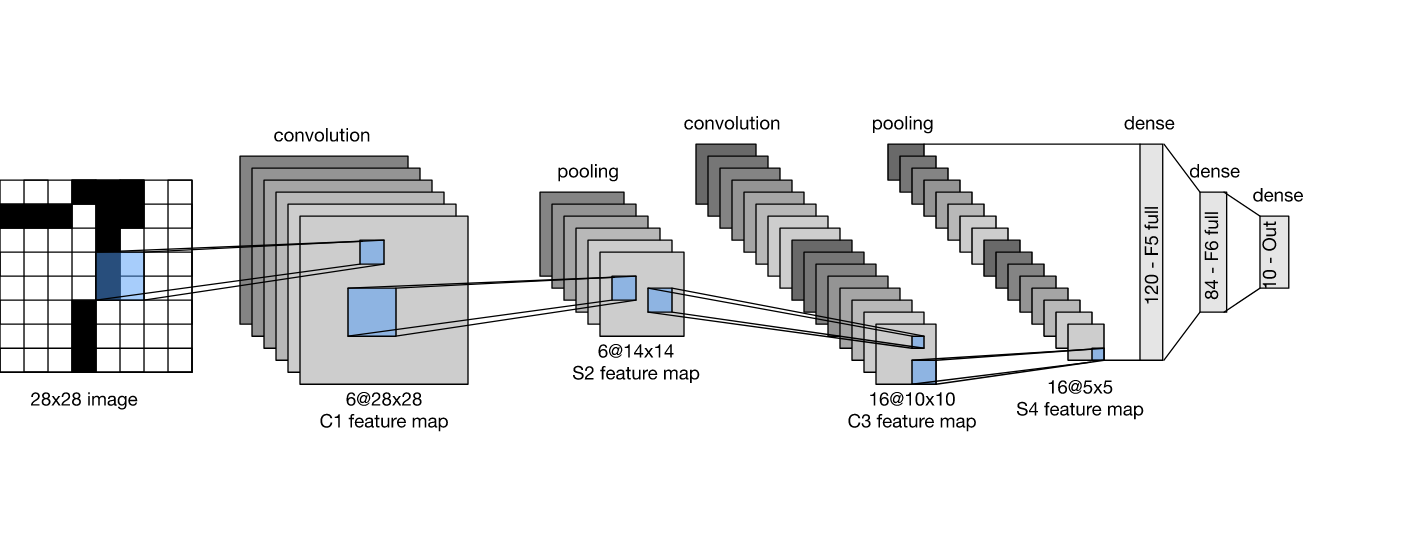

In [11]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.conv1 = nn.Conv2d(1,6,5, padding=2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc_1 = nn.Linear(16*5*5, 120)
    self.fc_2 = nn.Linear(120, 84)
    self.fc_3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.avg_pool2d(F.sigmoid(self.conv1(x)),(2,2))
    x = F.avg_pool2d(F.sigmoid(self.conv2(x)),(2,2))
    x = x.view((-1,16*5*5))
    x = F.sigmoid(self.fc_1(x))
    x = F.sigmoid(self.fc_2(x))
    x = self.fc_3(x)
    return x


In [13]:
lenet =LeNet()

In [14]:
summary(lenet, input_size = (1,28,28), batch_size = 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [32, 6, 28, 28]             156
            Conv2d-2           [32, 16, 10, 10]           2,416
            Linear-3                  [32, 120]          48,120
            Linear-4                   [32, 84]          10,164
            Linear-5                   [32, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.10
Forward/backward pass size (MB): 1.59
Params size (MB): 0.24
Estimated Total Size (MB): 1.92
----------------------------------------------------------------


In [15]:
def train(dataloader, model, loss_fn, op_fn):
  size = len(dataloader.dataset)
  model.train()
  for batch, (x,y) in enumerate(dataloader):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    op_fn.zero_grad()
    loss.backward()
    op_fn.step()

    if batch % 100 ==0:
      loss, current = loss.item(), batch * len(x)
      print(f"loss is {loss}  [{current} / {size}]")

In [16]:
def test(dataloader, model, loss_fn):

  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  correct, test_loss = 0,0
  with torch.no_grad():
    for x,y in dataloader:
      y_pred = model(x)
      test_loss += loss_fn(y_pred, y).item()
      correct += (y_pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"accuracy is {correct*100} test_loss is {test_loss}")

In [17]:

loss_function = nn.CrossEntropyLoss()

optimizer_function = torch.optim.Adam(lenet.parameters(), lr = 1e-3)

In [18]:
EPOCHS = 20

for epochs in range(EPOCHS):
  print(f"epoch: {epochs+1} ---------------------------")
  train(train_dl, lenet, loss_function, optimizer_function)
  test(test_dl, lenet, loss_function)

print('DONE')

epoch: 1 ---------------------------
loss is 2.3925461769104004  [0 / 60000]
loss is 2.3375775814056396  [3200 / 60000]
loss is 2.2584266662597656  [6400 / 60000]
loss is 1.582751989364624  [9600 / 60000]
loss is 1.0771687030792236  [12800 / 60000]
loss is 0.5383689403533936  [16000 / 60000]
loss is 0.5707240104675293  [19200 / 60000]
loss is 0.3510250151157379  [22400 / 60000]
loss is 0.34435155987739563  [25600 / 60000]
loss is 0.22074885666370392  [28800 / 60000]
loss is 0.3420306146144867  [32000 / 60000]
loss is 0.2575947940349579  [35200 / 60000]
loss is 0.3858243227005005  [38400 / 60000]
loss is 0.3020856976509094  [41600 / 60000]
loss is 0.41980817914009094  [44800 / 60000]
loss is 0.28874945640563965  [48000 / 60000]
loss is 0.4482291340827942  [51200 / 60000]
loss is 0.2837064266204834  [54400 / 60000]
loss is 0.33576735854148865  [57600 / 60000]
accuracy is 93.87 test_loss is 0.2009925433812431
epoch: 2 ---------------------------
loss is 0.09584303945302963  [0 / 60000]
lo

#`Transfer Learning`

In [22]:
with zipfile.ZipFile("hymenoptera_data.zip", "r") as f:
  f.extractall("data_2")

In [27]:
train_path = os.path.join("data_2", "hymenoptera_data", "train")
test_path = os.path.join("data_2", "hymenoptera_data", "val")

In [34]:
tfms_hym = transforms.Compose([

        transforms.Resize(size = (100,100)),
        transforms.ToTensor(),
        transforms.Normalize(mean = (0.5,0.5,0.5), std = (0.2,0.2,0.2))
])

In [35]:
train_ds = datasets.ImageFolder(

      root = train_path,
      transform = tfms_hym
)



test_ds = datasets.ImageFolder(

      root = test_path,
      transform = tfms_hym
)

In [36]:
train_ds.class_to_idx

{'ants': 0, 'bees': 1}

In [37]:
train_dl = DataLoader(train_ds, batch_size = 16, shuffle = True)

test_dl = DataLoader(test_ds, batch_size = 16, shuffle = False)

In [38]:
train_dl.dataset

Dataset ImageFolder
    Number of datapoints: 244
    Root location: data_2/hymenoptera_data/train
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.2, 0.2, 0.2))
           )

In [39]:
res_net = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

In [40]:
summary(res_net, input_size = (3,100,100), batch_size = 16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 64, 50, 50]           9,408
       BatchNorm2d-2           [16, 64, 50, 50]             128
              ReLU-3           [16, 64, 50, 50]               0
         MaxPool2d-4           [16, 64, 25, 25]               0
            Conv2d-5           [16, 64, 25, 25]           4,096
       BatchNorm2d-6           [16, 64, 25, 25]             128
              ReLU-7           [16, 64, 25, 25]               0
            Conv2d-8           [16, 64, 25, 25]          36,864
       BatchNorm2d-9           [16, 64, 25, 25]             128
             ReLU-10           [16, 64, 25, 25]               0
           Conv2d-11          [16, 256, 25, 25]          16,384
      BatchNorm2d-12          [16, 256, 25, 25]             512
           Conv2d-13          [16, 256, 25, 25]          16,384
      BatchNorm2d-14          [16, 256,

In [41]:
for param in res_net.parameters():
  param.requires_grad = False

In [42]:
res_net.fc = nn.Linear(res_net.fc.in_features, 2)

In [43]:
summary(res_net, input_size = (3,100,100), batch_size = 16)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 64, 50, 50]           9,408
       BatchNorm2d-2           [16, 64, 50, 50]             128
              ReLU-3           [16, 64, 50, 50]               0
         MaxPool2d-4           [16, 64, 25, 25]               0
            Conv2d-5           [16, 64, 25, 25]           4,096
       BatchNorm2d-6           [16, 64, 25, 25]             128
              ReLU-7           [16, 64, 25, 25]               0
            Conv2d-8           [16, 64, 25, 25]          36,864
       BatchNorm2d-9           [16, 64, 25, 25]             128
             ReLU-10           [16, 64, 25, 25]               0
           Conv2d-11          [16, 256, 25, 25]          16,384
      BatchNorm2d-12          [16, 256, 25, 25]             512
           Conv2d-13          [16, 256, 25, 25]          16,384
      BatchNorm2d-14          [16, 256,

In [44]:
loss_fn = nn.CrossEntropyLoss()

opt_res = torch.optim.Adam(params = res_net.parameters(), lr = 1e-3)

In [45]:
EPOCHS = 20

for epochs in range(EPOCHS):
  print(f"epoch: {epochs+1} ---------------------------")
  train(train_dl, res_net, loss_fn, opt_res)
  test(test_dl, res_net, loss_fn)

print('DONE')

epoch: 1 ---------------------------
loss is 0.7118259072303772  [0 / 244]
accuracy is 83.00653594771242 test_loss is 0.508835643529892
epoch: 2 ---------------------------
loss is 0.4591546356678009  [0 / 244]
accuracy is 84.31372549019608 test_loss is 0.4399202734231949
epoch: 3 ---------------------------
loss is 0.4022071063518524  [0 / 244]
accuracy is 84.9673202614379 test_loss is 0.3944307819008827
epoch: 4 ---------------------------
loss is 0.40738555788993835  [0 / 244]
accuracy is 86.27450980392157 test_loss is 0.3565222755074501
epoch: 5 ---------------------------
loss is 0.22836934030056  [0 / 244]
accuracy is 87.58169934640523 test_loss is 0.34592496454715727
epoch: 6 ---------------------------
loss is 0.24662907421588898  [0 / 244]
accuracy is 88.23529411764706 test_loss is 0.35298249274492266
epoch: 7 ---------------------------
loss is 0.2551671266555786  [0 / 244]
accuracy is 85.62091503267973 test_loss is 0.35863327234983444
epoch: 8 ---------------------------
los